In [1]:
import sys
sys.path.append('./modules')

import os
from tqdm import tqdm
import torch
from torch import optim
import matplotlib.pyplot as plt
import numpy as np
import cv2
import modules.config as config
from modules.dataset import prepare_MaskDataset
from modules.vae import VAE
from modules.trainer import VaeTrainer
from modules.gen import generate_synthetic_masks

%load_ext autoreload
%autoreload 2


# Training


In [2]:
train_dataset, val_dataset, train_dataloader, val_dataloader = prepare_MaskDataset(img_dirs=config.IMG_DIRS,
                                                                                   batch_size=config.BATCH_SIZE,
                                                                                   validation_split=config.VALIDATION_SPLIT,
                                                                                   fraction=config.FRACTION,
                                                                                   transform=config.TRANSFORM)

In [3]:
# Model configuration
model = VAE(in_channels=config.IN_CHANNELS,
            out_channels=config.OUT_CHANNELS,
            base_channels=config.BASE_CHANNELS,
            channel_multipliers=config.CHANNEL_MULTIPLIERS,
            num_res_blocks=config.NUM_RES_BLOCKS,
            latent_dim=config.LATENT_DIM,
            img_size=config.IMG_SIZE,
            device=config.DEVICE)

# Create SWA model
swa_model = optim.swa_utils.AveragedModel(model)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=config.LEARNING_RATE)

# Trainer
trainer = VaeTrainer(model=model,
                     optimizer=optimizer,
                     device=config.DEVICE,
                     swa_model=swa_model)


In [4]:
# Train
history = trainer.train(train_dataloader=train_dataloader,
                        num_epochs=config.NUM_EPOCHS,
                        kl_weight=config.KL_WEIGHT,
                        save_folder=config.SAVE_FOLDER,
                        val_dataloader=val_dataloader,
                        grad_clip=config.GRAD_CLIP,
                        checkpoint_every=config.CHECKPOINT_EVERY)

  0%|          | 0/298 [00:00<?, ?batches/s]

Epoch 1: 100%|██████████| 298/298 [00:40<00:00,  7.36batches/s, dice=0.840, kl_loss=797.789814, rec_loss=0.058742, total_loss=0.066720]


Validation total loss: 0.049859, Reconstruction loss: 0.041099, KL loss: 875.936806 Dice Coefficient: 0.886


Epoch 2: 100%|██████████| 298/298 [00:39<00:00,  7.53batches/s, dice=0.908, kl_loss=716.686736, rec_loss=0.032124, total_loss=0.039291]


Validation total loss: 0.056537, Reconstruction loss: 0.045370, KL loss: 1116.733326 Dice Coefficient: 0.884


Epoch 3: 100%|██████████| 298/298 [00:39<00:00,  7.53batches/s, dice=0.913, kl_loss=790.396060, rec_loss=0.030149, total_loss=0.038053]


Validation total loss: 0.041137, Reconstruction loss: 0.030031, KL loss: 1110.645401 Dice Coefficient: 0.915


Epoch 4: 100%|██████████| 298/298 [00:39<00:00,  7.53batches/s, dice=0.925, kl_loss=698.235453, rec_loss=0.025759, total_loss=0.032742]


Validation total loss: 0.050648, Reconstruction loss: 0.037823, KL loss: 1282.562595 Dice Coefficient: 0.892


Epoch 5: 100%|██████████| 298/298 [00:39<00:00,  7.53batches/s, dice=0.928, kl_loss=692.487376, rec_loss=0.024702, total_loss=0.031627]


Validation total loss: 0.037200, Reconstruction loss: 0.028838, KL loss: 836.204857 Dice Coefficient: 0.923


Epoch 6: 100%|██████████| 298/298 [00:39<00:00,  7.53batches/s, dice=0.933, kl_loss=661.583259, rec_loss=0.023027, total_loss=0.029643]


Validation total loss: 0.029239, Reconstruction loss: 0.022876, KL loss: 636.324261 Dice Coefficient: 0.936
SWA model updated at epoch 5


Epoch 7: 100%|██████████| 298/298 [00:39<00:00,  7.52batches/s, dice=0.923, kl_loss=1104.134557, rec_loss=0.027453, total_loss=0.038495]


Validation total loss: 0.037482, Reconstruction loss: 0.029352, KL loss: 812.992790 Dice Coefficient: 0.921


Epoch 8: 100%|██████████| 298/298 [00:39<00:00,  7.52batches/s, dice=0.937, kl_loss=669.629140, rec_loss=0.021382, total_loss=0.028078]


Validation total loss: 0.027313, Reconstruction loss: 0.020939, KL loss: 637.395660 Dice Coefficient: 0.941


Epoch 9: 100%|██████████| 298/298 [00:39<00:00,  7.53batches/s, dice=0.942, kl_loss=643.450022, rec_loss=0.019875, total_loss=0.026310]


Validation total loss: 0.027514, Reconstruction loss: 0.021036, KL loss: 647.843258 Dice Coefficient: 0.940


Epoch 10: 100%|██████████| 298/298 [00:39<00:00,  7.53batches/s, dice=0.945, kl_loss=615.081672, rec_loss=0.018783, total_loss=0.024934]


Validation total loss: 0.024931, Reconstruction loss: 0.018078, KL loss: 685.298603 Dice Coefficient: 0.949


Epoch 11: 100%|██████████| 298/298 [00:39<00:00,  7.53batches/s, dice=0.947, kl_loss=626.144272, rec_loss=0.018195, total_loss=0.024456]


Validation total loss: 0.024379, Reconstruction loss: 0.017979, KL loss: 639.985611 Dice Coefficient: 0.950
SWA model updated at epoch 10


Epoch 12: 100%|██████████| 298/298 [00:39<00:00,  7.53batches/s, dice=0.949, kl_loss=628.285110, rec_loss=0.017694, total_loss=0.023976]


Validation total loss: 0.031479, Reconstruction loss: 0.024009, KL loss: 746.934013 Dice Coefficient: 0.935


Epoch 13: 100%|██████████| 298/298 [00:39<00:00,  7.52batches/s, dice=0.950, kl_loss=599.618089, rec_loss=0.017184, total_loss=0.023180]


Validation total loss: 0.023197, Reconstruction loss: 0.017341, KL loss: 585.575304 Dice Coefficient: 0.951


Epoch 14: 100%|██████████| 298/298 [00:39<00:00,  7.53batches/s, dice=0.953, kl_loss=590.901681, rec_loss=0.016148, total_loss=0.022057]


Validation total loss: 0.023709, Reconstruction loss: 0.017781, KL loss: 592.854033 Dice Coefficient: 0.950


Epoch 15: 100%|██████████| 298/298 [00:39<00:00,  7.53batches/s, dice=0.954, kl_loss=592.753134, rec_loss=0.015828, total_loss=0.021756]


Validation total loss: 0.023359, Reconstruction loss: 0.017788, KL loss: 557.163900 Dice Coefficient: 0.949


# Saving

In [5]:
model.save_model(save_folder=config.SAVE_FOLDER)
model.save_history(history=history, save_folder=config.SAVE_FOLDER)

swa_model_file = os.path.join(config.SAVE_FOLDER, 'SWAModel.pt')
torch.save(swa_model.module.state_dict(), swa_model_file)


# Loading

In [ ]:
model = VAE.load_model(save_folder=config.SAVE_FOLDER).to(config.DEVICE)
swa_model = VAE.load_model(save_folder=config.SAVE_FOLDER, swa_version=True).to(config.DEVICE)

# Analysis

### Reconstruction example

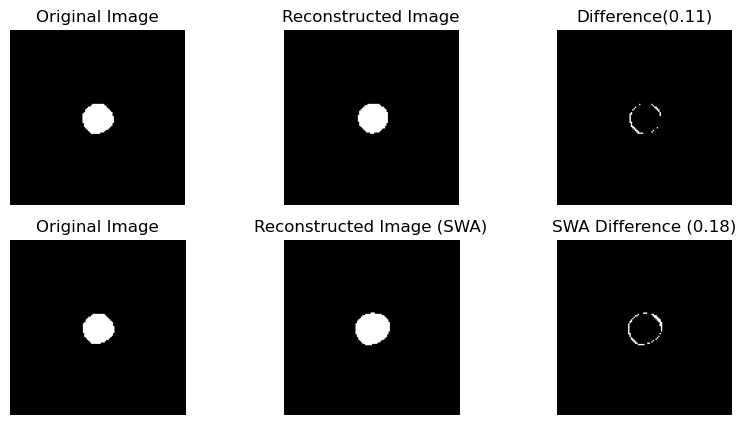

In [61]:

i = np.random.randint(0, len(val_dataset))
img = val_dataset[i][0].unsqueeze(0)

img_rec = model(img.to(config.DEVICE))[0]
img_rec = (img_rec.cpu() > 0.5).float()
diff = torch.abs(img - img_rec).squeeze(0).permute(1, 2, 0)
metric = torch.sum(diff) / torch.sum(img)

img_rec_swa = swa_model(img.to(config.DEVICE))[0]
img_rec_swa = (img_rec_swa.cpu() > 0.5).float()
diff_swa = torch.abs(img - img_rec_swa).squeeze(0).permute(1, 2, 0)
metric_swa = torch.sum(diff_swa) / torch.sum(img)

# Plot the original and reconstructed images side by side
fig, ax = plt.subplots(2, 3, figsize=(10, 5))
ax[0, 0].imshow(img.squeeze(0).permute(1, 2, 0).numpy(), cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')
ax[0, 1].imshow(img_rec.squeeze(0).permute(1, 2, 0).detach().numpy(), cmap='gray')
ax[0, 1].set_title('Reconstructed Image')
ax[0, 1].axis('off')
ax[0, 2].imshow(diff, cmap='gray')
ax[0, 2].set_title(f'Difference({metric:.2f})')
ax[0, 2].axis('off')
ax[1, 0].imshow(img.squeeze(0).permute(1, 2, 0).numpy(), cmap='gray')
ax[1, 0].set_title('Original Image')
ax[1, 0].axis('off')
ax[1, 1].imshow(img_rec_swa.squeeze(0).permute(1, 2, 0).detach().numpy(), cmap='gray')
ax[1, 1].set_title('Reconstructed Image (SWA)')
ax[1, 1].axis('off')
ax[1, 2].imshow(diff_swa, cmap='gray')
ax[1, 2].set_title(f'SWA Difference ({metric_swa:.2f})')
ax[1, 2].axis('off')
plt.show()


### Single-cell generation example 

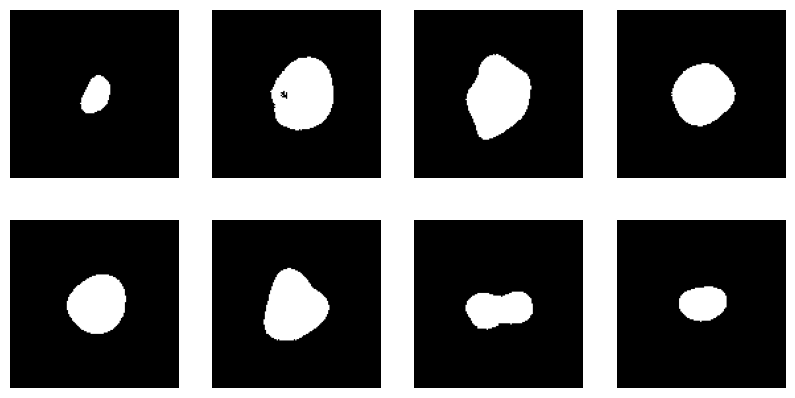

In [62]:
samples = model.sample(8).cpu()

# plot 8 images in a grid 2x4
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
for i in range(4):
    ax[0, i].imshow(samples[i].permute(1, 2, 0).numpy(), cmap='gray')
    ax[0, i].axis('off')
    ax[1, i].imshow(samples[i + 4].permute(1, 2, 0).numpy(), cmap='gray')
    ax[1, i].axis('off')


### Single-cell generation analysis

In [5]:
def extract_shape_features(mask):
    """Extracts shape features from a binary mask.
    
    Parameters
    ----------
    mask : numpy.ndarray
        Binary mask of the cell with shape (H, W) and dtype np.uint8
    
    Returns
    -------
    shape_features : list
        List of shape features: area, perimeter, centroid_x, centroid_y, aspect_ratio, extent, eccentricity, orientation
    """
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Assuming the largest contour is the cell
    cnt = contours[0]
    
    # Area
    area = cv2.contourArea(cnt)
    
    # Perimeter
    perimeter = cv2.arcLength(cnt, True)
    
    # Centroid
    M = cv2.moments(cnt)
    centroid_x = int(M['m10'] / M['m00'])
    centroid_y = int(M['m01'] / M['m00'])
    
    # Bounding Box
    x, y, w, h = cv2.boundingRect(cnt)
    bounding_box = (x, y, w, h)
    
    # Aspect Ratio
    aspect_ratio = float(w) / h
    
    # Extent
    rect_area = w * h
    extent = float(area) / rect_area
    
    # Eccentricity, Orientation, Major and Minor Axes
    (x, y), (MA, ma), angle = cv2.fitEllipse(cnt)
    eccentricity = np.sqrt(1 - (MA/ma)**2)
    orientation = angle

    shape_features = [area, perimeter, centroid_x, centroid_y, aspect_ratio, extent, eccentricity, orientation]
    
    return shape_features


def extract_real_features(dataset, num_samples):
    """Extracts shape features from real masks.
    
    Parameters
    ----------
    dataset : MaskDataset
        MaskDataset object
    num_samples : int
        Number of samples to extract features from
    
    Returns
    -------
    real_features : numpy.ndarray
        Array of shape (num_samples, 8) containing shape features
    """
    real_features = []
    counter = 0
    issue = 0
    for i in range(len(dataset)):
        if counter >= num_samples:
            break
        try:
            mask = dataset[i][0].squeeze(0).numpy().astype(np.uint8)
            shape_features = extract_shape_features(mask)
            real_features.append(shape_features)
            counter += 1
        except:
            issue += 1
            
    real_features = np.array(real_features)
    
    return real_features, issue


def extract_gen_features(model, num_samples):
    """Extracts shape features from generated masks.
    
    Parameters
    ----------
    model : VAE
        VAE model
    num_samples : int
        Number of samples to extract features from
    
    Returns
    -------
    gen_features : numpy.ndarray
        Array of shape (num_samples, 8) containing shape features
    """
    gen_features = []
    counter = 0
    for _ in range(num_samples):
        try:
            mask = model.sample(1)[0].squeeze(0).cpu().numpy().astype(np.uint8)
            shape_features = extract_shape_features(mask)
            gen_features.append(shape_features)
            counter += 1
        except:
            pass
    gen_features = np.array(gen_features)
    
    return gen_features

In [6]:
real_features, _ = extract_real_features(val_dataset, 1000)
gen_features = extract_gen_features(model, 1000)

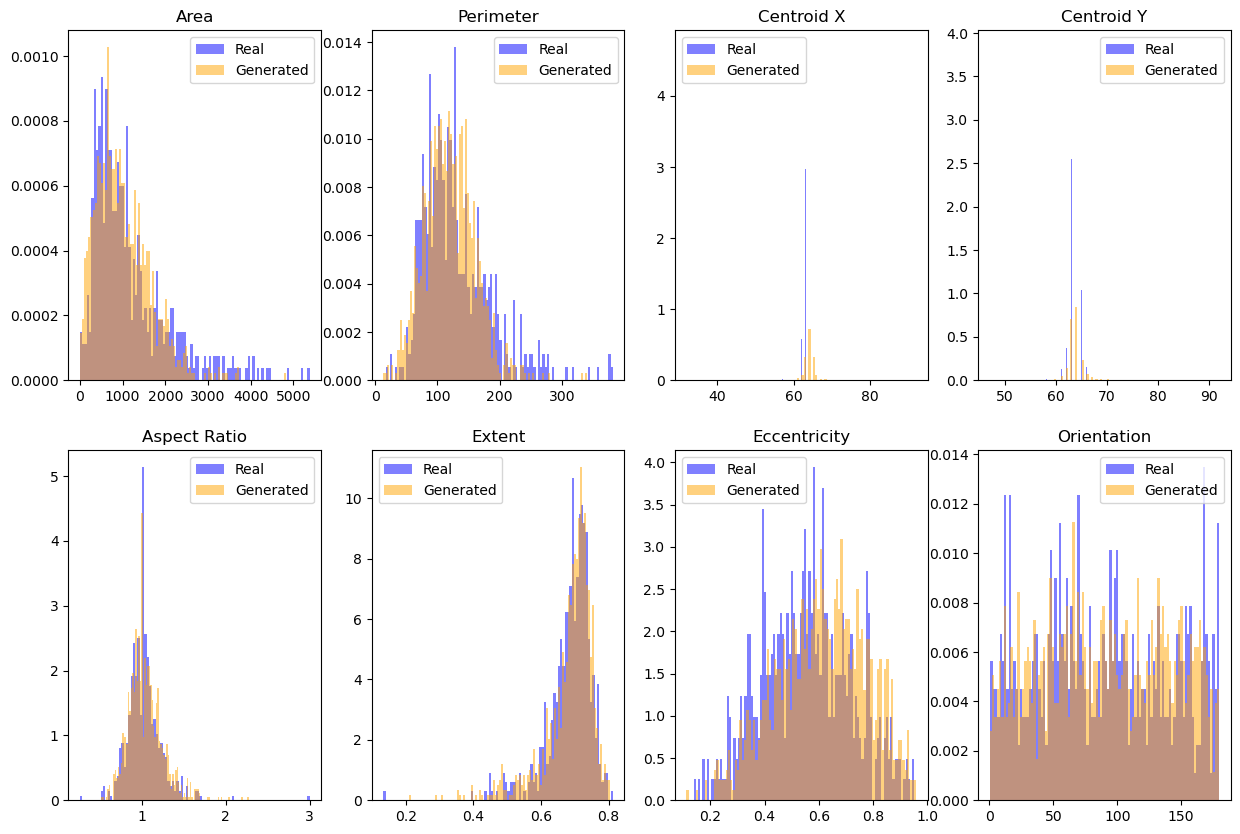

In [7]:

# Plot the histograms of the shape features
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
for i in range(8):
    ax[i // 4, i % 4].hist(real_features[:, i], bins=100, alpha=0.5, label='Real', color='blue', density=True)
    ax[i // 4, i % 4].hist(gen_features[:, i], bins=100, alpha=0.5, label='Generated', color='orange', density=True)
    ax[i // 4, i % 4].set_title(['Area', 'Perimeter', 'Centroid X', 'Centroid Y', 'Aspect Ratio', 'Extent', 'Eccentricity', 'Orientation'][i])
    ax[i // 4, i % 4].legend()


# Synthetic mask patches generation

In [3]:
def count_num_cells(mask):
    # Find contours in the binary image
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # The number of contours found is the number of objects
    num_objects = len(contours)
    
    return num_objects

def estimate_num_cells_distribution(filenames, num_samples):
    num_cells = []
    for i in tqdm(range(num_samples)):
        mask = plt.imread(filenames[i])[:, 256:, 0].astype(np.uint8)
        num_objects = count_num_cells(mask)
        num_cells.append(num_objects)
    return num_cells


In [4]:
ctr_dir = '/mnt/local/work/filippo.schiazza/citology_patches_with_masks/CTR'
mds_dir = '/mnt/local/work/filippo.schiazza/citology_patches_with_masks/MDS'
aml_dir = '/mnt/local/work/filippo.schiazza/citology_patches_with_masks/AML'

ctr_files = os.listdir(ctr_dir)
mds_files = os.listdir(mds_dir)
aml_files = os.listdir(aml_dir)

ctr_filenames = [os.path.join(ctr_dir, file) for file in ctr_files]
mds_filenames = [os.path.join(mds_dir, file) for file in mds_files]
aml_filenames = [os.path.join(aml_dir, file) for file in aml_files]

# Create one list and shuffle it
filenames = ctr_filenames + mds_filenames + aml_filenames
np.random.shuffle(filenames)

In [5]:
num_cells = estimate_num_cells_distribution(filenames, 10000)

  0%|          | 29/10000 [00:00<01:12, 137.54it/s]

100%|██████████| 10000/10000 [01:05<00:00, 152.19it/s]


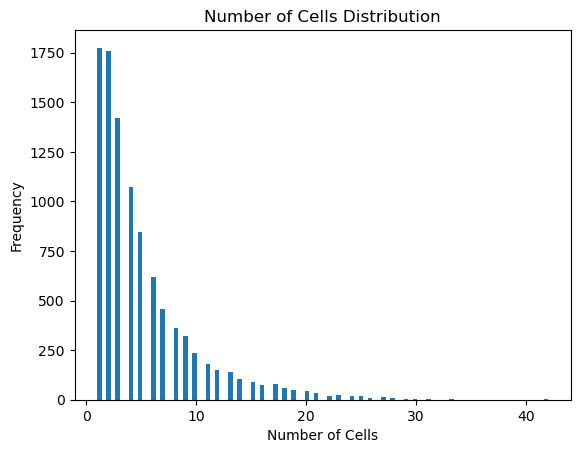

In [53]:
plt.hist(num_cells, bins=100)
plt.xlabel('Number of Cells')
plt.ylabel('Frequency')
plt.title('Number of Cells Distribution')
plt.show()

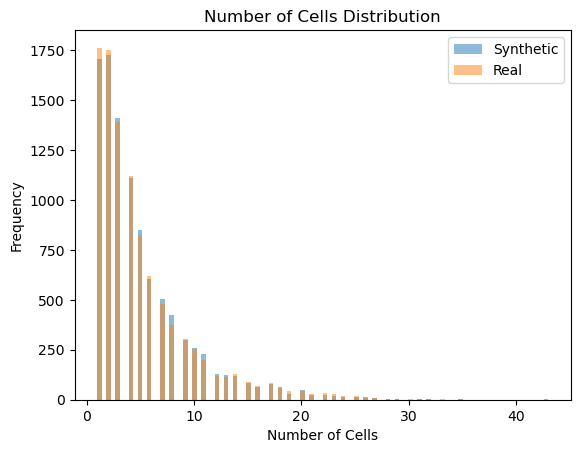

In [9]:
x, frequencies = np.unique(num_cells, return_counts=True)
probabilities = frequencies / np.sum(frequencies)
n = 10000
syn_num_cells = np.random.choice(x, size=n, p=probabilities)

plt.hist(syn_num_cells, bins=100, alpha=0.5, label='Synthetic')
plt.hist(num_cells, bins=100, alpha=0.5, label='Real')
plt.xlabel('Number of Cells')
plt.ylabel('Frequency')
plt.title('Number of Cells Distribution')
plt.legend()
plt.show()

In [7]:
num_patches_to_generate = 24
syn_data = []

for i in range(num_patches_to_generate):
    n = np.random.choice(x, size=1, p=probabilities).item()
    syn = generate_synthetic_masks(num_cells=n, vae_model=model, size=256)
    syn_data.append(syn)

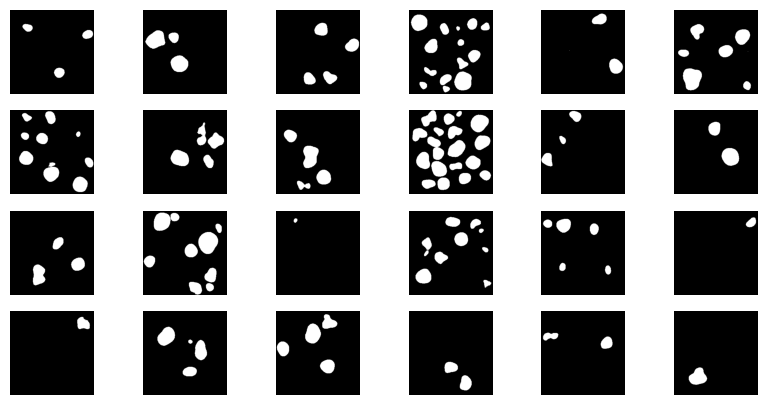

In [8]:
# plot 8 images in a grid 2x4
fig, ax = plt.subplots(4, 6, figsize=(10, 5))
for i in range(6):
    ax[0, i].imshow(syn_data[i], cmap='gray')
    ax[0, i].axis('off')
    ax[1, i].imshow(syn_data[i + 6], cmap='gray')
    ax[1, i].axis('off')
    ax[2, i].imshow(syn_data[i + 12], cmap='gray')
    ax[2, i].axis('off')
    ax[3, i].imshow(syn_data[i + 18], cmap='gray')
    ax[3, i].axis('off')

plt.show()
